In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import bidi.algorithm
import arabic_reshaper
import os

In [6]:
def to_farsi(matn):
    return bidi.algorithm.get_display(
        arabic_reshaper.reshape(
            u'%s' % matn
        )
    )

In [7]:
word_counts_path = '../../results/word_counts.txt'
word_counts = pd.read_csv(word_counts_path, sep=' ', names=['counts', 'words'])
word_counts.head()

,counts,words
0,14044,و
1,8507,به
2,8153,که
3,7707,از
4,7237,در


In [8]:
words = word_counts.words[:20]
counts = word_counts.counts[:20]
words.shape, counts.shape

((20,), (20,))

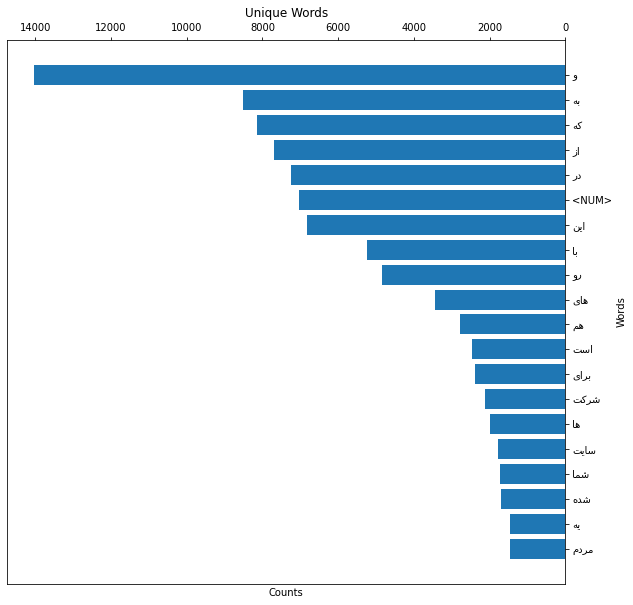

In [11]:
# Example data
fig, ax = plt.subplots(figsize=(10,10))

y_pos = np.arange(len(words))

ax.barh(y_pos, counts, align='center')
ax.set_yticks(y_pos, labels=[to_farsi(word) for word in words])
ax.set_xlabel('Counts')
ax.set_ylabel('Words')
ax.set_title('Unique Words')

ax.invert_yaxis()
ax.xaxis.tick_top()
ax.invert_xaxis()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")


In [12]:
counter = 0
blacklist = ['ها', 'به', 'از', 'های', 'برای', 'رو', 'را', 'با', 'در', 'و', 'که', 'یا', 'تا']
counts_new = []
words_new = []
for word, count in zip(word_counts.words, word_counts.counts):
    if word not in blacklist:
        words_new.append(word)
        counts_new.append(count)
        counter += 1
    
    if counter > 19:
        break

len(counts_new), len(words_new)




(20, 20)

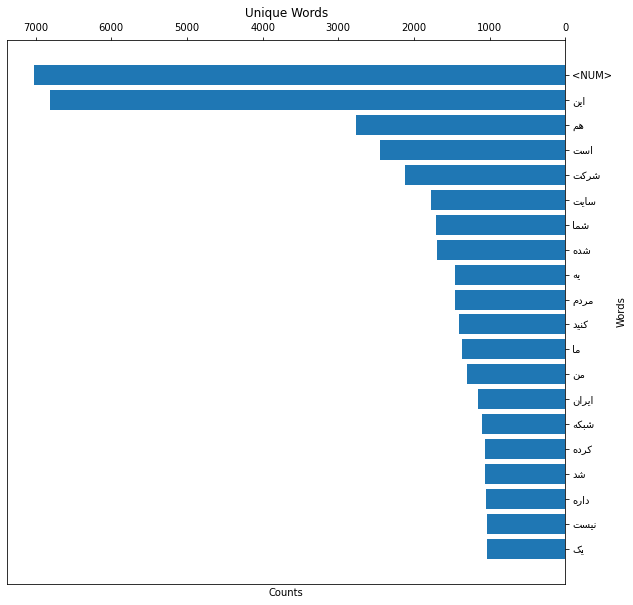

In [13]:
# Example data
fig, ax = plt.subplots(figsize=(10,10))

y_pos = np.arange(len(words_new))

ax.barh(y_pos, counts_new, align='center')
ax.set_yticks(y_pos, labels=[to_farsi(word) for word in words_new])
ax.set_xlabel('Counts')
ax.set_ylabel('Words')
ax.set_title('Unique Words')

ax.invert_yaxis()
ax.xaxis.tick_top()
ax.invert_xaxis()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")


In [32]:
HW_path = '/Users/parsa/Daneshgah/Arshad/2/NLP/Homeworks/HW1'
VOCAB_PATH = os.path.join(HW_path, 'results/lexicon.txt')

unks = []
unk_count = 0
for word, count in zip(word_counts.words, word_counts.counts):
    if count < np.round(np.mean(word_counts.counts)/2):
        unks.append(word)
        counts_new.append(count)
        unk_count += count
    else:
        with open(VOCAB_PATH, 'a+') as f:
            line = word + '\n'
            f.write(line)

with open(VOCAB_PATH, 'a+') as f:
    line = '<UNK>' + str(unk_count) + '\n'
    f.write(line)

print(unk_count)




35023


In [10]:
np.mean(word_counts.counts)

17.30717287623365

In [23]:
j = 'جهرمی'

In [24]:
j in word_counts.words.to_list()

True

In [28]:
word_counts[word_counts['words'] == j]


,counts,words
415,141,جهرمی


In [ ]:
'<' in word_counts.words.to_list()

True

In [4]:
np.round(np.mean(word_counts.counts)/2)

9.0